### Metadata

In [1]:
%cd ..

/Users/davidrestrepo/Data Fusion/DF-DM


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
DIR_PATH = 'datasets/violence_prediction/'
file = 'metadata_labels.csv'
cohort = 'cities.csv'

### Read file

In [4]:
cities = pd.read_csv(DIR_PATH + cohort)
cities

,lat,lng,Municipality,Municipality code,ISO
0,6.2447,-75.5748,Medellín,5001,CO-ANT
1,3.4400,-76.5197,Cali,76001,CO-VAC
2,4.5781,-74.2144,Soacha,25754,CO-CUN
3,4.1425,-73.6294,Villavicencio,50001,CO-MET
4,1.2136,-77.2811,Pasto,52001,CO-NAR
5,10.9639,-74.7964,Barranquilla,8001,CO-ATL
6,7.1186,-73.1161,Bucaramanga,68001,CO-SAN
7,4.4378,-75.2006,Ibagué,73001,CO-TOL
8,2.4411,-76.6061,Popayán,19001,CO-CAU
9,7.9075,-72.5047,Cúcuta,54001,CO-NSA


In [5]:
df = pd.read_csv(DIR_PATH + file)
df.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,202322,202323,202324,202325,202326,202327,202328,202329,202330,202331
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,171,150,148,162,140,137,148,145,119,45
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,2,1,0,0,1,0,0,4,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,1,1,3,1,1,1,3,2,0,0


#### Get Cohort

In [6]:
# filter from df only the cities in the cohort
df = df[df['Municipality'].isin(cities['Municipality'])]
df

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,202322,202323,202324,202325,202326,202327,202328,202329,202330,202331
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,171,150,148,162,140,137,148,145,119,45
125,8001,Barranquilla,1166120,1178933,1191261,1203035,1213705,1222997,1229782,1231220,...,55,47,51,56,34,41,63,56,57,9
361,19001,Popayán,267499,270060,272730,275580,278598,280918,283410,287312,...,26,28,27,38,25,19,34,33,33,12
544,25754,Soacha,425088,434658,445502,459688,484624,521469,549235,569469,...,68,78,46,39,48,46,41,56,52,17
685,50001,Villavicencio,416457,428581,440768,452918,464534,475146,485565,495613,...,17,25,13,22,25,22,27,38,29,17
714,52001,Pasto,391184,392834,394200,395579,398441,401906,401525,399215,...,37,32,39,35,39,36,36,30,42,8
778,54001,Cúcuta,625064,632621,639844,646330,650910,653191,656235,659497,...,16,19,13,17,20,28,32,32,35,8
844,68001,Bucaramanga,544426,548584,552316,555887,560107,564983,568145,569954,...,31,27,22,30,27,30,26,23,13,5
957,73001,Ibagué,505035,503738,502794,502450,503439,505734,507360,509342,...,52,34,34,36,38,28,36,22,24,12
1004,76001,Cali,2119853,2126148,2132929,2142983,2161633,2187824,2200879,2205718,...,125,94,121,135,106,129,111,102,112,31


### EDA

### Metadata

In [7]:
df[df.columns[:53]].describe()

,Municipality code,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,...,Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2
count,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43076.300000,8.746852e+05,8.825846e+05,8.903733e+05,8.987860e+05,9.095911e+05,9.224214e+05,9.310986e+05,9.363411e+05,9.393898e+05,...,3.08700,35.531000,21.696910,26.187990,22.292510,8.252610,2.669480,1.379920,0.950456,770.212919
std,26682.083685,7.416292e+05,7.461205e+05,7.502589e+05,7.548457e+05,7.611450e+05,7.689656e+05,7.728678e+05,7.731071e+05,7.700258e+05,...,1.91148,7.725436,6.449088,7.774275,7.654377,6.413291,2.212379,1.556868,1.126903,753.369767
min,5001.000000,2.674990e+05,2.700600e+05,2.727300e+05,2.755800e+05,2.785980e+05,2.809180e+05,2.834100e+05,2.873120e+05,2.924540e+05,...,0.88000,23.990000,12.111700,13.595400,11.620900,0.051500,0.036600,0.034900,0.157383,97.184792
25%,20689.250000,4.186148e+05,4.301002e+05,4.419515e+05,4.546105e+05,4.695565e+05,4.827930e+05,4.910138e+05,4.990452e+05,5.066430e+05,...,1.38000,30.857500,17.522475,21.492650,17.487600,5.498575,1.280350,0.135675,0.184777,127.033893
50%,51001.000000,5.247305e+05,5.261610e+05,5.275550e+05,5.291685e+05,5.317730e+05,5.432260e+05,5.586900e+05,5.697115e+05,5.801335e+05,...,3.04500,36.865000,20.068800,25.730600,20.045500,7.589200,2.224550,0.499650,0.276139,580.560367
75%,64501.000000,1.030856e+06,1.042355e+06,1.053407e+06,1.063859e+06,1.073006e+06,1.080546e+06,1.086395e+06,1.088289e+06,1.084025e+06,...,4.61000,38.892500,25.808800,31.441525,26.999525,9.231525,2.865450,2.489075,1.429792,1089.896657
max,76001.000000,2.286126e+06,2.309689e+06,2.331389e+06,2.353410e+06,2.379920e+06,2.410046e+06,2.428850e+06,2.436071e+06,2.431666e+06,...,5.99000,48.980000,34.315100,39.787700,38.180200,24.392700,6.572500,3.840000,3.433735,2102.057895


### Labels

In [8]:
from src.Preprocessing.time_series_preprocessing import read_labels

In [9]:
labels = read_labels(df)
labels.index = labels.index.astype(int)
labels

,Medellín,Barranquilla,Popayán,Soacha,Villavicencio,Pasto,Cúcuta,Bucaramanga,Ibagué,Cali
201751,81,12,25,35,25,23,10,48,8,37
201752,77,11,16,35,12,32,4,25,3,12
201801,120,20,25,62,28,47,18,59,10,90
201802,136,29,28,37,31,40,14,29,17,64
201803,144,27,29,37,26,24,16,36,13,80
...,...,...,...,...,...,...,...,...,...,...
202249,157,48,23,56,40,26,25,28,41,108
202250,117,34,25,24,26,24,18,12,31,110
202251,98,43,18,20,22,26,18,7,29,97
202252,77,46,15,16,35,21,10,6,17,54


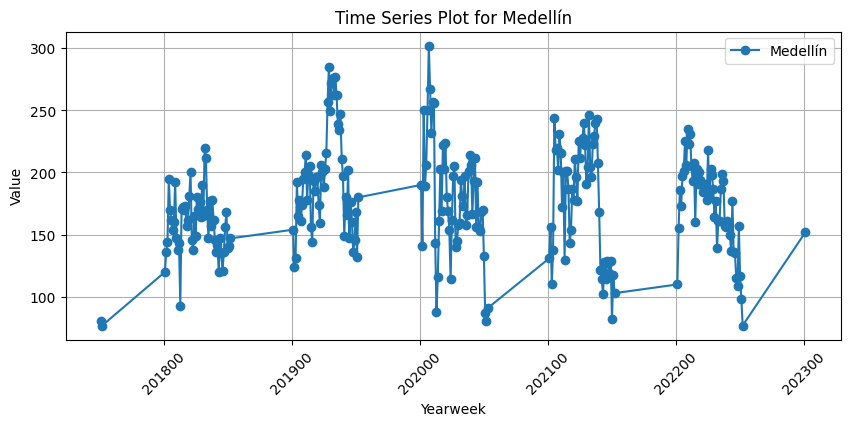

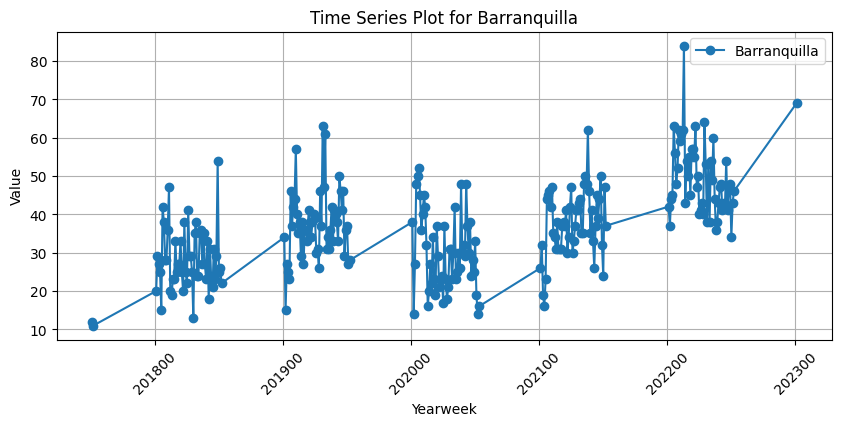

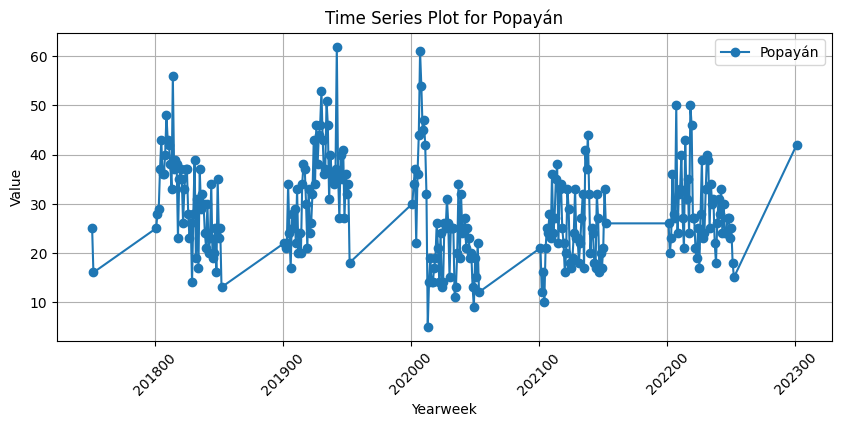

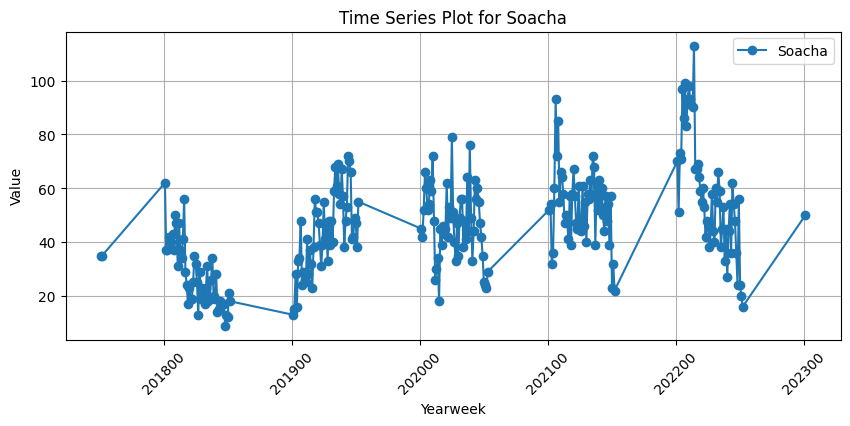

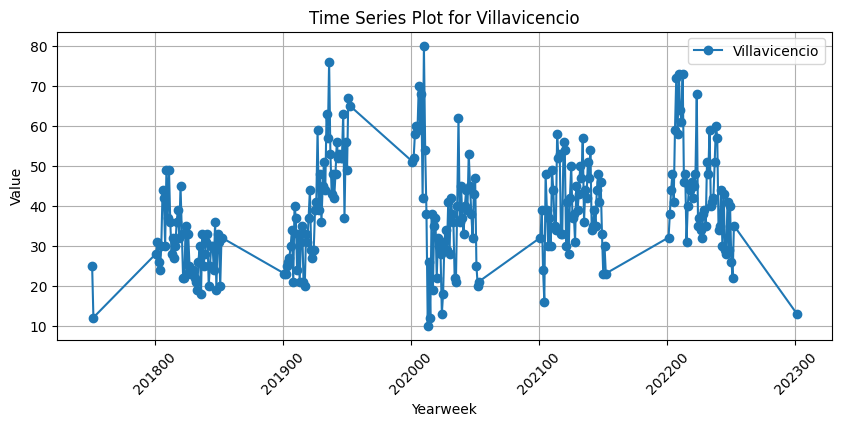

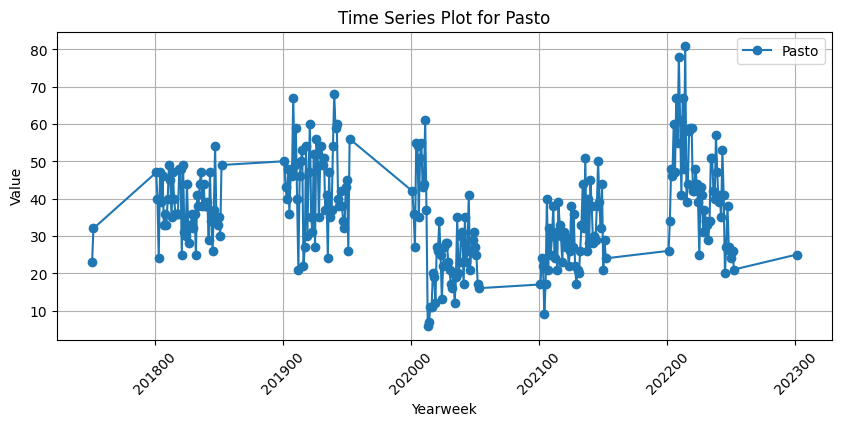

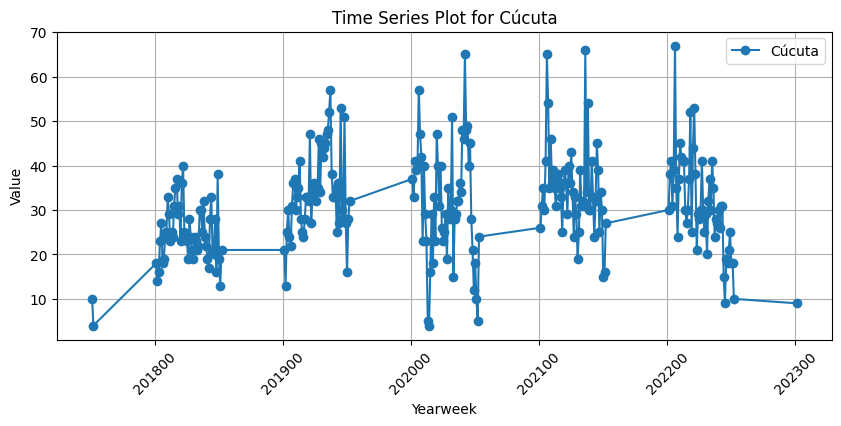

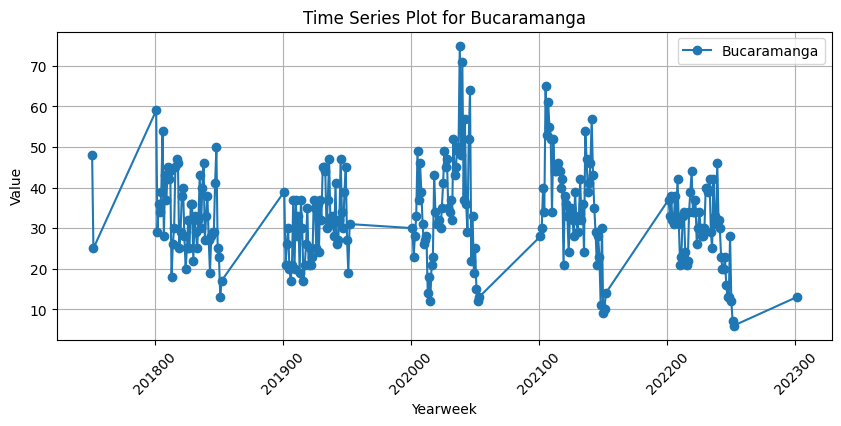

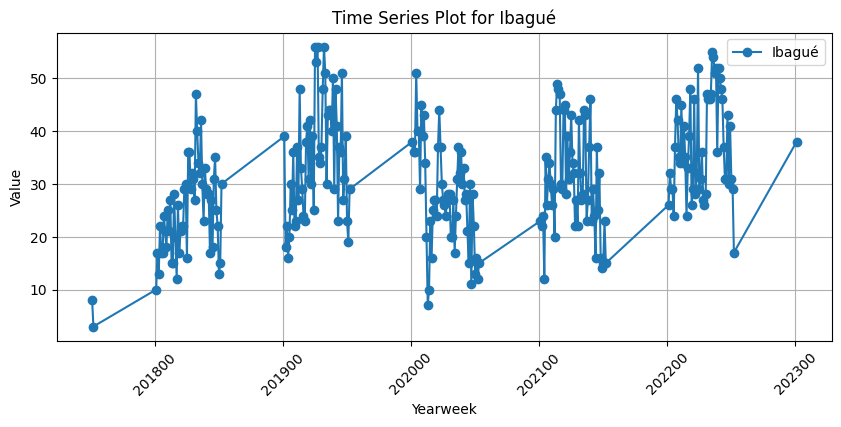

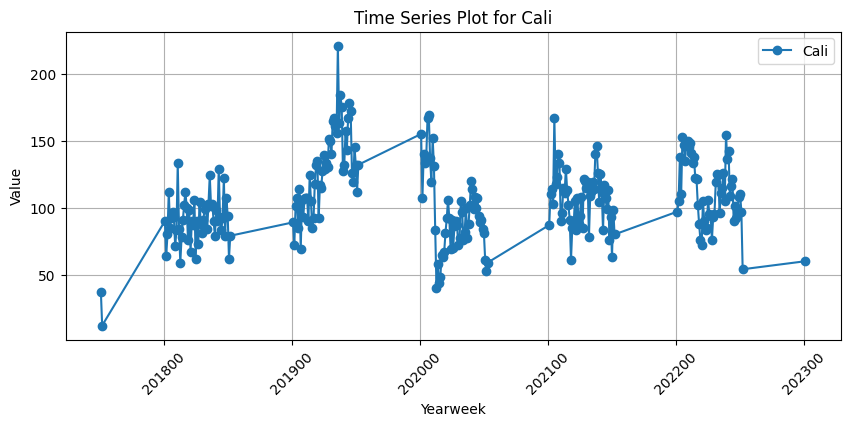

In [10]:
for column in labels.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(labels.index, labels[column], marker='o', linestyle='-', label=column)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Yearweek')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

### Predictions

In [11]:
from src.Preprocessing.time_series_preprocessing import get_dataset, train_test_split, normalize_train_features, normalize_test_features, series_to_supervised, features_labels_set, reshape_tensor
from src.Preprocessing.time_series_preprocessing import read_static, read_features
from src.Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std

import pandas as pd
import os
import numpy as np
import random
import tensorflow as tf
import torch

def set_all_seeds(seed):
    """
    Set seed for reproducibility in different libraries.
    :param seed: An integer representing the seed value.
    """
    random.seed(seed)  # Python's built-in random module
    np.random.seed(seed)  # Numpy library
    os.environ['PYTHONHASHSEED'] = str(seed)  # Environment variable

    # TensorFlow
    tf.random.set_seed(seed)
    if tf.__version__[0] == '2':
        # For TensorFlow 2.x, additionally set the global random seed
        tf.compat.v1.set_random_seed(seed)

    # PyTorch
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        # If using GPU with PyTorch, set additional seeds
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # for multi-GPU

##### Constants

In [12]:
""" Read Dataset:"""
image_embeddings = None # 'Embeddings/Embeddings_dinov2_large.csv'
media_data = None # 'datasets/violence_prediction/media_data.csv'
static = 'datasets/violence_prediction/metadata_labels.csv'

DIR_PATH = 'datasets/violence_prediction/'
file = 'metadata_labels.csv'
labels = pd.read_csv(DIR_PATH + file)

# Get list of municipalities:
cohort = 'cities.csv'
cities = pd.read_csv(DIR_PATH + cohort)
Municipalities = cities.Municipality.values

""" Dataset Preprocessing:"""
train_percentage = 80
T = 3
autoregressive = False
feature_range = (-1, 1)

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False

seed = 1
n_tests = 3

### Read and Preprocess the Data

#### Read the Data

In [13]:
# Read dataset
dengue_df = [get_dataset(labels_path=labels, embeddings_path=image_embeddings, municipality=Municipality, temp_prec=media_data, static=static) for Municipality in Municipalities]
type(dengue_df)

Obtaining dataframe for the city of Medellín only...
Obtaining dataframe for the city of Cali only...
Obtaining dataframe for the city of Soacha only...
Obtaining dataframe for the city of Villavicencio only...
Obtaining dataframe for the city of Pasto only...
Obtaining dataframe for the city of Barranquilla only...
Obtaining dataframe for the city of Bucaramanga only...
Obtaining dataframe for the city of Ibagué only...
Obtaining dataframe for the city of Popayán only...
Obtaining dataframe for the city of Cúcuta only...


list

In [14]:
dengue_df[4]

,Age0-4(%),Age5-14(%),Age15-29(%),Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),PeoplewithDisabilities(%),Peoplewhocannotreadorwrite(%),Secondary/HigherEducation(%),Employedpopulation(%),...,Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2,population,Labels
201751,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,23
201752,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,32
201801,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,47
201802,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,40
201803,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202248,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,27
202249,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,26
202250,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,24
202251,5.53,12.52,25.91,56.03,0.92,2.24,10.71,3.51,61.14,41.65,...,26.4333,31.4948,17.2883,5.8753,2.0299,0.0366,0.157383,97.184792,393704.5,26


#### Train-Test Split

In [15]:
train_df = []
test_df = []

for i in range(len(dengue_df)):
    train_df_aux, test_df_aux = train_test_split(dengue_df[i], train_percentage)
    train_df.append(train_df_aux)
    test_df.append(test_df_aux)
#test_df

The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)
The train shape is: (210, 27)
The test shape is: (53, 27)


#### Normalize the Data

In [16]:
scalers_list = []
# Scale train:
for i in range(len(train_df)):
    train_df[i], scalers = normalize_train_features(train_df[i], feature_range=feature_range)
    scalers_list.append(scalers)
    
train_df[1].head()

,Age0-4(%),Age5-14(%),Age15-29(%),Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),PeoplewithDisabilities(%),Peoplewhocannotreadorwrite(%),Secondary/HigherEducation(%),Employedpopulation(%),...,Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2,population,Labels
201751,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-2.238233
201752,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-3.066099
201801,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-0.483158
201802,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-1.344138
201803,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-0.814304


In [17]:
# Scale test:
for i in range(len(test_df)):
    test_df[i] = normalize_test_features(test_df[i], scalers=scalers_list[i])

test_df[1].head()

,Age0-4(%),Age5-14(%),Age15-29(%),Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),PeoplewithDisabilities(%),Peoplewhocannotreadorwrite(%),Secondary/HigherEducation(%),Employedpopulation(%),...,Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2,population,Labels
202152,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-0.814304
202201,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,-0.251356
202202,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,0.013561
202203,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,1.106344
202204,8.881784e-16,1.776357e-15,0.0,7.105427e-15,-1.776357e-15,1.110223e-16,0.0,0.0,1.421085e-14,0.0,...,-3.552714e-15,3.552714e-15,-3.552714e-15,-1.776357e-15,-8.881784e-16,0.0,0.0,-4.547474e-13,0.0,0.179134


#### Prepare data for time series supervised learning (function to create sliding window)

In [18]:
# frame as supervised learning
train = [series_to_supervised(df, n_in=T, autoregressive=autoregressive) for df in train_df]
test = [series_to_supervised(df, n_in=T, autoregressive=autoregressive) for df in test_df]

train[1].shape

(208, 79)

#### Features and Labels Set

In [19]:
# Train features and labels set
print('Train:')
train_X = []
train_y = []
n_features = []

for i in range(len(train)):
    train_X_aux, train_y_aux, n_features_aux = features_labels_set(timeseries_data=train[i], original_df=dengue_df[i], autoregressive=autoregressive)
    train_X.append(train_X_aux)
    train_y.append(train_y_aux)
    n_features.append(n_features_aux)  

# Test features and labels set
print('Test:')
test_X = []
test_y = []
n_features = []
for i in range(len(test)):
    test_X_aux, test_y_aux, n_features_aux = features_labels_set(timeseries_data=test[i], original_df=dengue_df[i], autoregressive=autoregressive)
    test_X.append(test_X_aux)
    test_y.append(test_y_aux)
    n_features.append(n_features_aux)


Train:
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
The shape of the features is (208, 78)
The shape of the labels is (208, 1)
Test:
The shape of the features is (51, 78)
The shape of the labels is (51, 1)
The shape of the features is (51, 78)
The shape of the labels is (51, 1)
The shape of the features is (51, 78)
The shape of the labels is (51, 1)
The shape of the f

In [20]:
# reshape input to be 3D [samples, timesteps, features]
if T != 0:
    for i in range(len(train_X)):
        train_X[i], test_X[i] = reshape_tensor(train_X[i], test_X[i], n_features[i], T, autoregressive)

The initial shapes are:
The train shape is (208, 78)
The test shape is (51, 78)
-----------------------
The Final shapes are:
The train shape is (208, 3, 26)
The test shape is (51, 3, 26)
The initial shapes are:
The train shape is (208, 78)
The test shape is (51, 78)
-----------------------
The Final shapes are:
The train shape is (208, 3, 26)
The test shape is (51, 3, 26)
The initial shapes are:
The train shape is (208, 78)
The test shape is (51, 78)
-----------------------
The Final shapes are:
The train shape is (208, 3, 26)
The test shape is (51, 3, 26)
The initial shapes are:
The train shape is (208, 78)
The test shape is (51, 78)
-----------------------
The Final shapes are:
The train shape is (208, 3, 26)
The test shape is (51, 3, 26)
The initial shapes are:
The train shape is (208, 78)
The test shape is (51, 78)
-----------------------
The Final shapes are:
The train shape is (208, 3, 26)
The test shape is (51, 3, 26)
The initial shapes are:
The train shape is (208, 78)
The tes

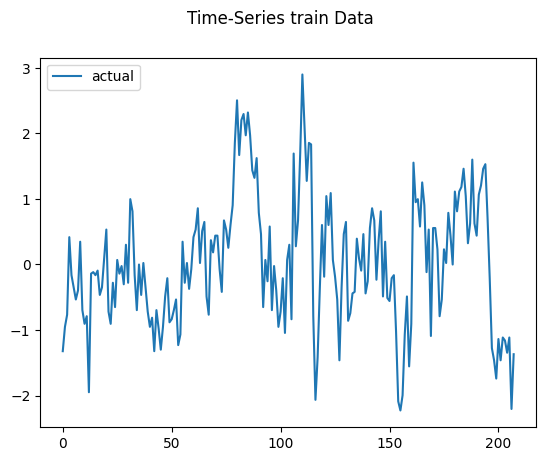

2024-01-16 14:29:39.103616: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-16 14:29:39.103658: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-16 14:29:39.103661: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-16 14:29:39.103846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-16 14:29:39.104034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-01-16 14:29:41.163213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:41.506220: I te

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:29:47.616242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:47.714459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:47.779645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 52ms/step
Test MAE: 27.285
Test RMSE: 34.101
Test sMAPE: 16.351
Test R Squared: -0.001
{'mae': 27.28495549220665, 'rmse': 34.101477407537935, 'smape': 16.35109135156286, 'r2': -0.0005646300992347975}


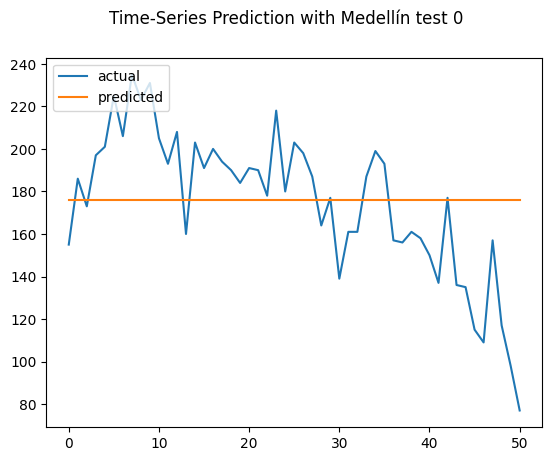

2024-01-16 14:29:49.880385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:50.180707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:50.224660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:50.459213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:50.558507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:51.391493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:51.515231: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:29:55.557630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:55.655620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:55.706134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 35ms/step
Test MAE: 27.283
Test RMSE: 34.102
Test sMAPE: 16.350
Test R Squared: -0.001
{'mae': 27.283167521158855, 'rmse': 34.101719596008614, 'smape': 16.350037996989762, 'r2': -0.0005788421566883528}


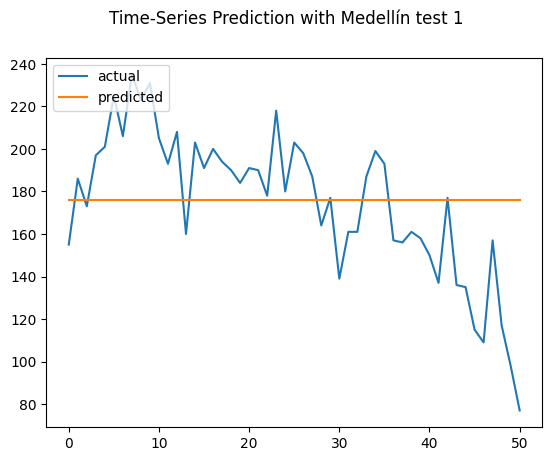

2024-01-16 14:29:57.504362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:57.805676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:57.848385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:58.110966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:58.221307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:59.024091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:29:59.155352: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:30:03.219730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:03.321877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:03.368467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 49ms/step
Test MAE: 27.292
Test RMSE: 34.101
Test sMAPE: 16.355
Test R Squared: -0.001
{'mae': 27.291908114564183, 'rmse': 34.10056424053922, 'smape': 16.355187705314126, 'r2': -0.0005110447160503462}


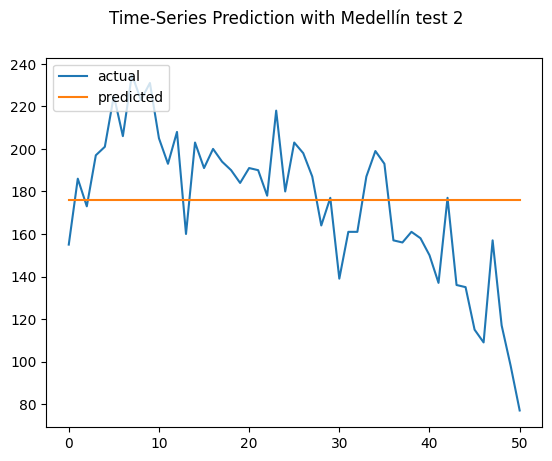

rmse : average=34.101, std=0.000
mae : average=27.287, std=0.004
smape : average=16.352, std=0.002
r2 : average=-0.001, std=0.000


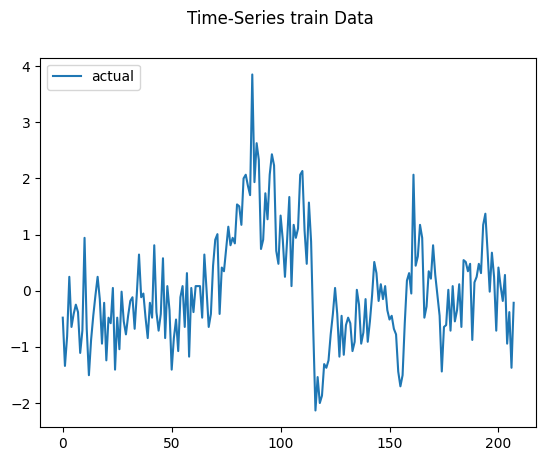

2024-01-16 14:30:06.134900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:06.462609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:06.513516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:06.775910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:06.873670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:07.695817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:07.813865: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 16.
Epoch 24: early stopping


2024-01-16 14:30:18.636168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:18.743838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:18.791117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 47ms/step
Test MAE: 20.072
Test RMSE: 24.830
Test sMAPE: 18.158
Test R Squared: -0.093
{'mae': 20.072430180568322, 'rmse': 24.830092990065193, 'smape': 18.157605762458086, 'r2': -0.09289719323547208}


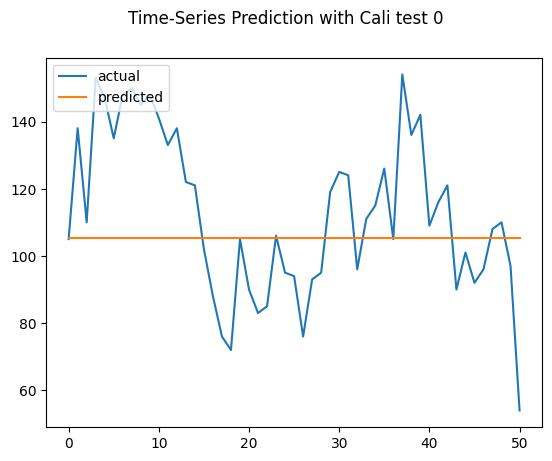

2024-01-16 14:30:20.690327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:21.023190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:21.073817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:21.358138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:21.483725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:22.387233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:22.512484: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 15.
Epoch 23: early stopping


2024-01-16 14:30:35.157908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:35.850832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:35.970566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 106ms/step
Test MAE: 20.074
Test RMSE: 24.832
Test sMAPE: 18.159
Test R Squared: -0.093
{'mae': 20.073559031767005, 'rmse': 24.832492077783655, 'smape': 18.15865930755088, 'r2': -0.0931083952556826}


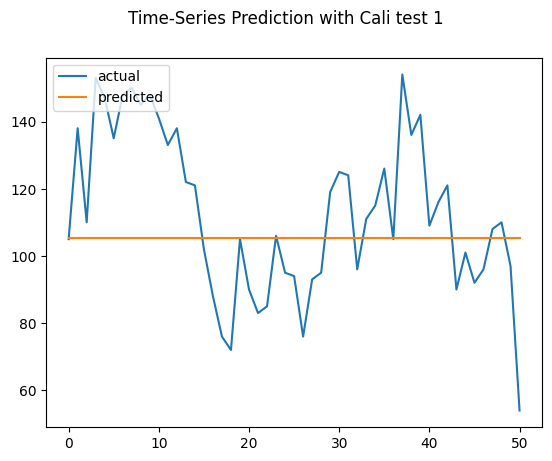

2024-01-16 14:30:38.750244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:39.107250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:39.181098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:39.568298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:39.742270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:42.258537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:42.413650: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 15.
Epoch 23: early stopping


2024-01-16 14:30:54.641773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:54.784846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 71ms/step


2024-01-16 14:30:54.855935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 20.074
Test RMSE: 24.834
Test sMAPE: 18.159
Test R Squared: -0.093
{'mae': 20.074200948079426, 'rmse': 24.833857420002026, 'smape': 18.159258413965574, 'r2': -0.0932286013200676}


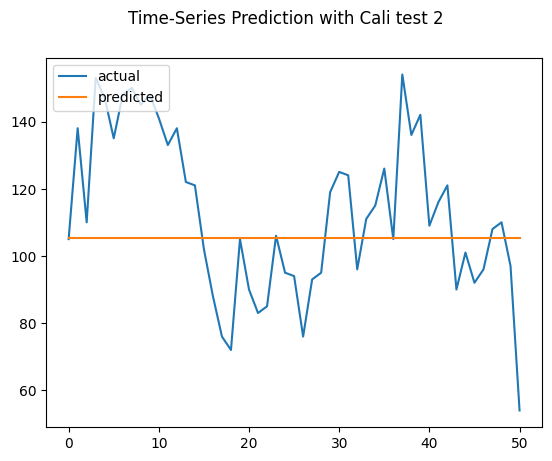

rmse : average=24.832, std=0.002
mae : average=20.073, std=0.001
smape : average=18.159, std=0.001
r2 : average=-0.093, std=0.000


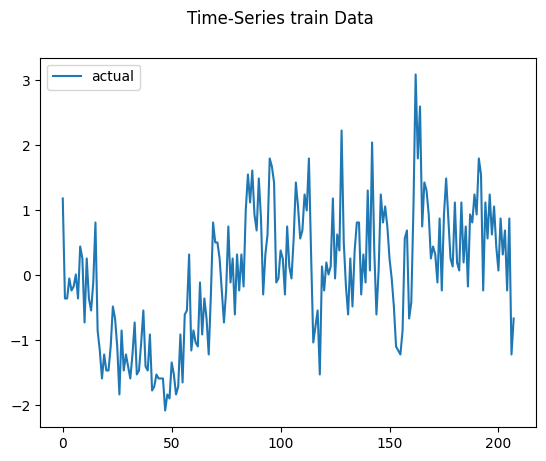

2024-01-16 14:30:57.047171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:57.469785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:57.542249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:57.905370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:58.053971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:59.066971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:30:59.264244: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 16.
Epoch 24: early stopping


2024-01-16 14:31:11.398826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:11.527549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:11.591926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 67ms/step
Test MAE: 20.408
Test RMSE: 26.817
Test sMAPE: 37.330
Test R Squared: -0.442
{'mae': 20.40752358530082, 'rmse': 26.81744030409727, 'smape': 37.3295974806171, 'r2': -0.4424563013749234}


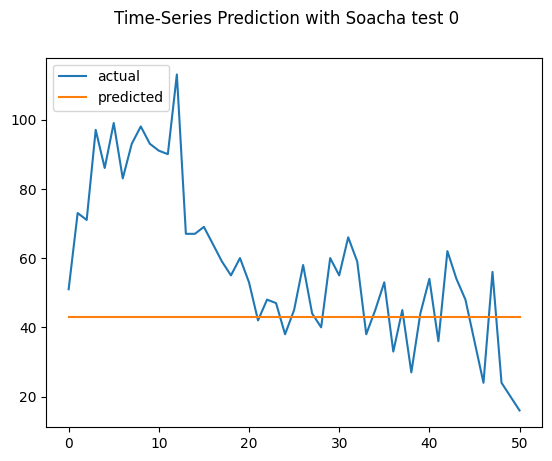

2024-01-16 14:31:13.713682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:14.032606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:14.099901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:14.525808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:14.806317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:15.919210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:16.051581: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 15.
Epoch 23: early stopping


2024-01-16 14:31:27.619412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:27.759099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 59ms/step


2024-01-16 14:31:27.826088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 20.400
Test RMSE: 26.809
Test sMAPE: 37.312
Test R Squared: -0.442
{'mae': 20.399619083778532, 'rmse': 26.80917396239076, 'smape': 37.31217927592984, 'r2': -0.44156717856400585}


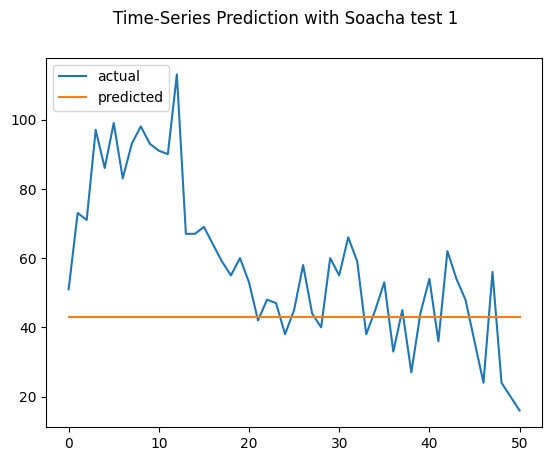

2024-01-16 14:31:31.600882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:31.992611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:32.059156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:32.508997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:32.673682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:33.739726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:33.898221: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 15.
Epoch 23: early stopping


2024-01-16 14:31:48.553478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:48.847871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:48.990253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 121ms/step
Test MAE: 20.405
Test RMSE: 26.814
Test sMAPE: 37.323
Test R Squared: -0.442
{'mae': 20.4047103582644, 'rmse': 26.814497636646554, 'smape': 37.32339785001641, 'r2': -0.44213975838826647}


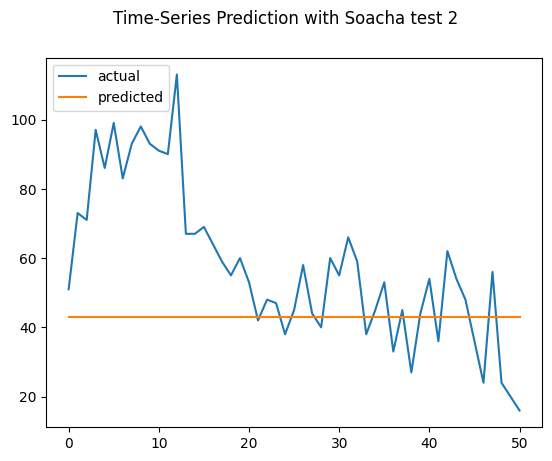

rmse : average=26.814, std=0.003
mae : average=20.404, std=0.003
smape : average=37.322, std=0.007
r2 : average=-0.442, std=0.000


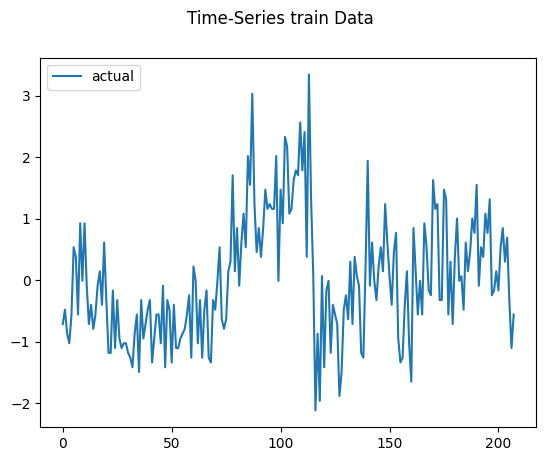

2024-01-16 14:31:51.395366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:51.735482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:51.812171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:52.250911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:52.465837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:53.471228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:31:53.594089: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 13.
Epoch 21: early stopping


2024-01-16 14:32:03.458644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:03.575289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:03.658330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 52ms/step
Test MAE: 10.595
Test RMSE: 14.231
Test sMAPE: 23.986
Test R Squared: -0.335
{'mae': 10.595274457744523, 'rmse': 14.231120995349205, 'smape': 23.985954344288427, 'r2': -0.3346821626951819}


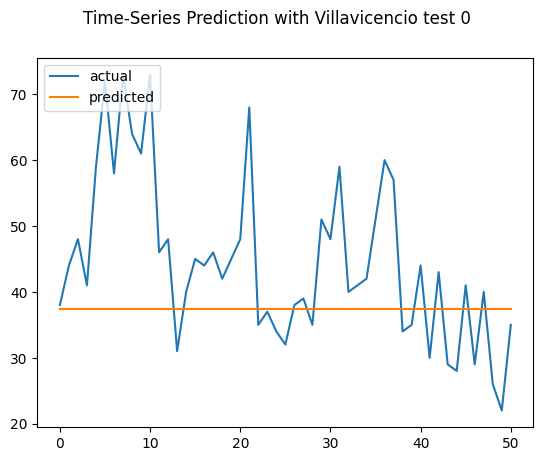

2024-01-16 14:32:07.529546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:07.891737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:07.952452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:08.314956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:08.459411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:09.333629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:09.478204: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 12.
Epoch 20: early stopping


2024-01-16 14:32:18.776870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:18.935940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 58ms/step


2024-01-16 14:32:19.015317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 10.593
Test RMSE: 14.228
Test sMAPE: 23.980
Test R Squared: -0.334
{'mae': 10.59280522664388, 'rmse': 14.22811904836325, 'smape': 23.97958810804508, 'r2': -0.3341191399352561}


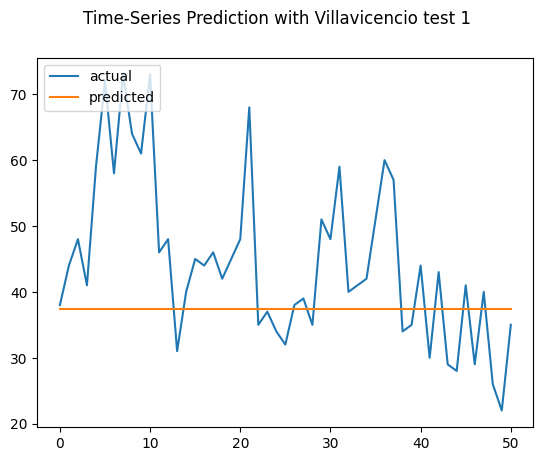

2024-01-16 14:32:20.875256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:21.236578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:21.301053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:21.689420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:21.853968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:22.876407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:23.023021: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 13.
Epoch 21: early stopping


2024-01-16 14:32:33.746510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:33.885837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:32:34.009192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 129ms/step
Test MAE: 10.593
Test RMSE: 14.229
Test sMAPE: 23.980
Test R Squared: -0.334
{'mae': 10.593146081064262, 'rmse': 14.228533326585023, 'smape': 23.980466864629122, 'r2': -0.3341968318001387}


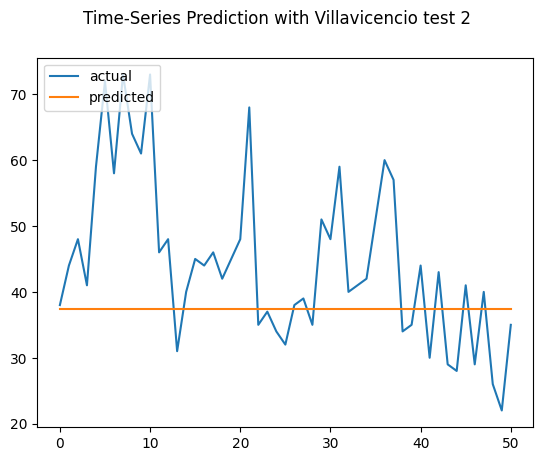

rmse : average=14.229, std=0.001
mae : average=10.594, std=0.001
smape : average=23.982, std=0.003
r2 : average=-0.334, std=0.000


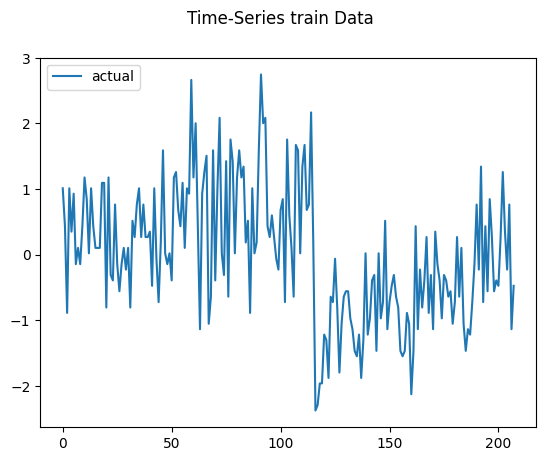

2024-01-16 14:32:36.725414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:37.083518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:37.165783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:37.770488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:38.008630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:39.231389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:39.384758: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:32:44.507493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:44.646464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:32:44.749719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 117ms/step
Test MAE: 12.069
Test RMSE: 15.678
Test sMAPE: 28.507
Test R Squared: -0.317
{'mae': 12.068579281077666, 'rmse': 15.677712940252988, 'smape': 28.507234748005622, 'r2': -0.3174684525073148}


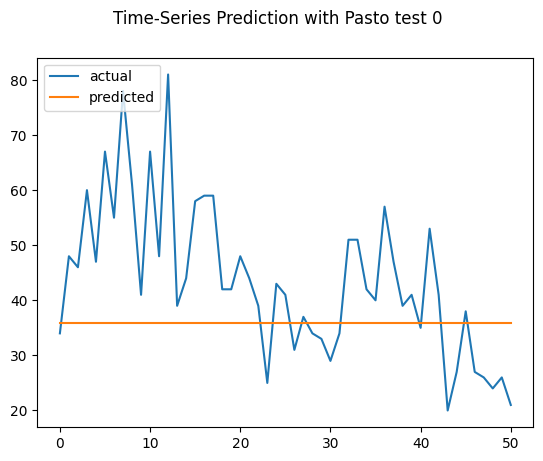

2024-01-16 14:32:49.189225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:49.621505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:49.715756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:50.284042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:50.535461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:51.740373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:51.899975: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:32:56.922899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:57.056709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 74ms/step


2024-01-16 14:32:57.130779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 12.077
Test RMSE: 15.688
Test sMAPE: 28.530
Test R Squared: -0.319
{'mae': 12.077185462502872, 'rmse': 15.687983370888396, 'smape': 28.530304345026604, 'r2': -0.31919515849551705}


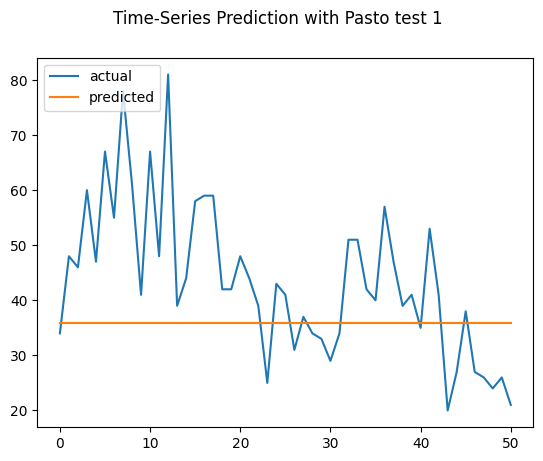

2024-01-16 14:32:59.249866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:59.581023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:32:59.642110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:00.158073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:00.292095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:01.378026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:01.507614: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:33:06.208124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:06.319691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:06.408968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 71ms/step
Test MAE: 12.114
Test RMSE: 15.732
Test sMAPE: 28.629
Test R Squared: -0.327
{'mae': 12.113886216107536, 'rmse': 15.732017687607465, 'smape': 28.628783272578875, 'r2': -0.32661120193885207}


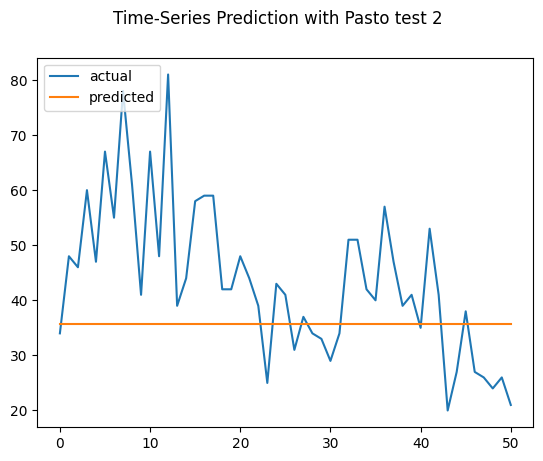

rmse : average=15.699, std=0.024
mae : average=12.087, std=0.020
smape : average=28.555, std=0.053
r2 : average=-0.321, std=0.004


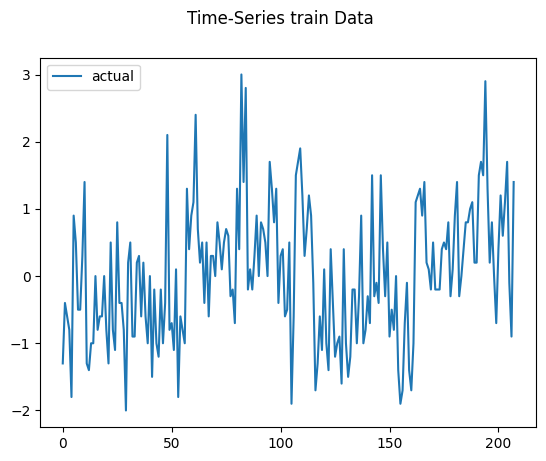

2024-01-16 14:33:09.985580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:10.433950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:10.523057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:11.069262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:11.265166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:12.503956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:12.641647: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 12.
Epoch 20: early stopping


2024-01-16 14:33:27.575309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:27.834510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:27.965362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 107ms/step
Test MAE: 16.085
Test RMSE: 18.625
Test sMAPE: 36.992
Test R Squared: -2.935
{'mae': 16.084970137652228, 'rmse': 18.624612926421776, 'smape': 36.992040697179185, 'r2': -2.9350701485539625}


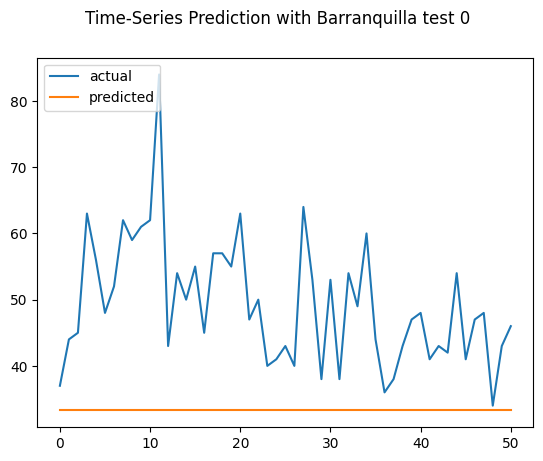

2024-01-16 14:33:35.939653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:36.379234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:36.480966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:37.097650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:37.310165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:38.730193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:38.888924: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 12.
Epoch 20: early stopping


2024-01-16 14:33:48.924781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:49.083045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 84ms/step


2024-01-16 14:33:49.199949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 16.086
Test RMSE: 18.626
Test sMAPE: 36.996
Test R Squared: -2.936
{'mae': 16.086221358355353, 'rmse': 18.625693541983374, 'smape': 36.99564488126264, 'r2': -2.935526793899156}


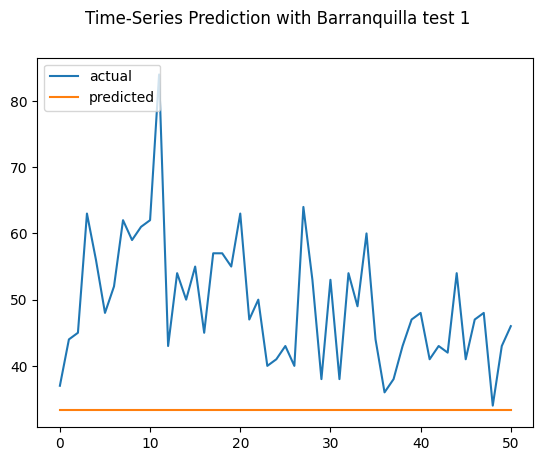

2024-01-16 14:33:51.662922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:52.074622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:52.174759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:52.705947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:52.933530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:54.240587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:33:54.375616: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 10.
Epoch 18: early stopping


2024-01-16 14:34:03.207829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:03.356264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:34:03.444856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 124ms/step
Test MAE: 16.087
Test RMSE: 18.626
Test sMAPE: 36.997
Test R Squared: -2.936
{'mae': 16.086648604449103, 'rmse': 18.626062537554667, 'smape': 36.99687560366719, 'r2': -2.9356827297132133}


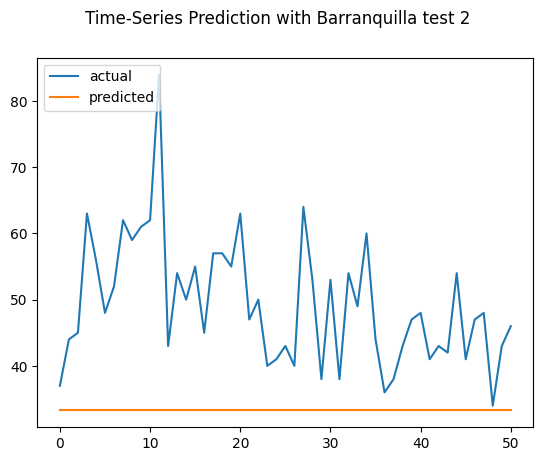

rmse : average=18.625, std=0.001
mae : average=16.086, std=0.001
smape : average=36.995, std=0.002
r2 : average=-2.935, std=0.000


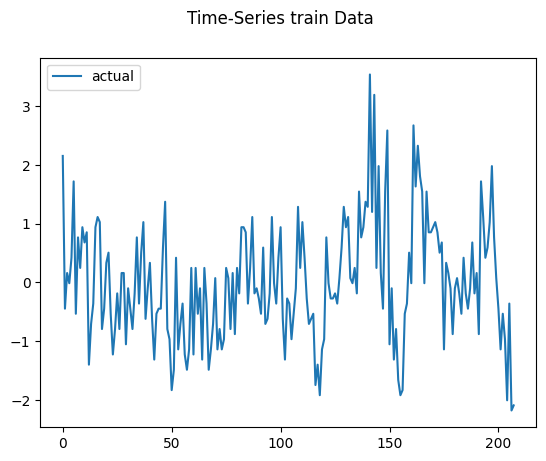

2024-01-16 14:34:08.830196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:09.250791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:09.347122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:09.909663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:10.127138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:11.394553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:11.567657: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:34:16.262632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:16.402449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:34:16.492761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 80ms/step
Test MAE: 7.799
Test RMSE: 10.398
Test sMAPE: 28.452
Test R Squared: -0.256
{'mae': 7.799454558129404, 'rmse': 10.397564443178663, 'smape': 28.451813760658716, 'r2': -0.2557717481979651}


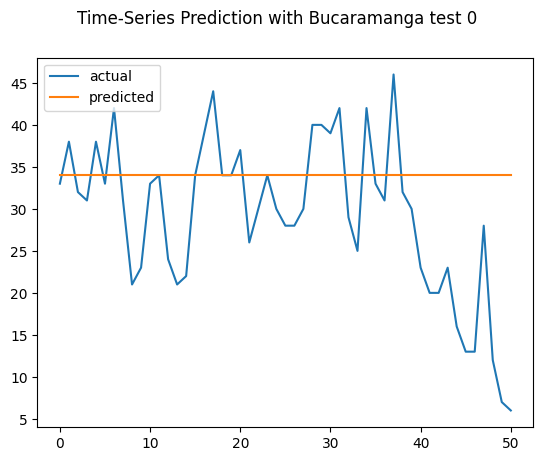

2024-01-16 14:34:18.582709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:18.977357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:19.126892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:19.987014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:20.262227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:21.626902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:21.818048: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:34:26.718769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:26.840330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 72ms/step


2024-01-16 14:34:26.924710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 7.802
Test RMSE: 10.402
Test sMAPE: 28.459
Test R Squared: -0.257
{'mae': 7.802380430932138, 'rmse': 10.401528782707505, 'smape': 28.4593528183364, 'r2': -0.2567295214652485}


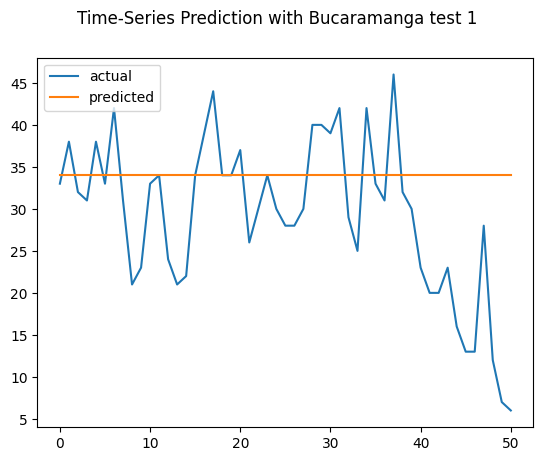

2024-01-16 14:34:30.378039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:30.832676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:30.952965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:31.740732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:31.977442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:33.555624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:33.713674: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:34:38.473482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:38.611640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 89ms/step


2024-01-16 14:34:38.699427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 7.806
Test RMSE: 10.406
Test sMAPE: 28.470
Test R Squared: -0.258
{'mae': 7.8062480851715685, 'rmse': 10.405607801741791, 'smape': 28.469629591333703, 'r2': -0.25771538207960276}


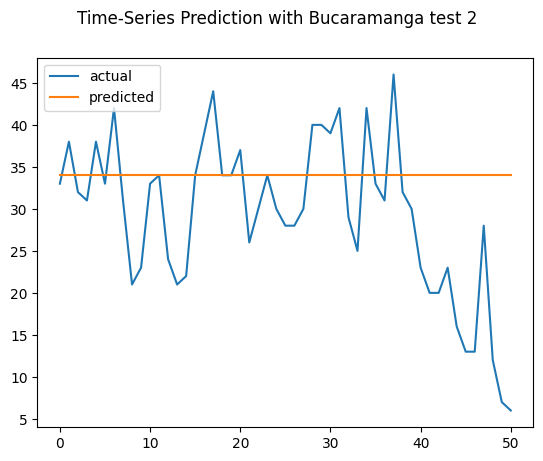

rmse : average=10.402, std=0.003
mae : average=7.803, std=0.003
smape : average=28.460, std=0.007
r2 : average=-0.257, std=0.001


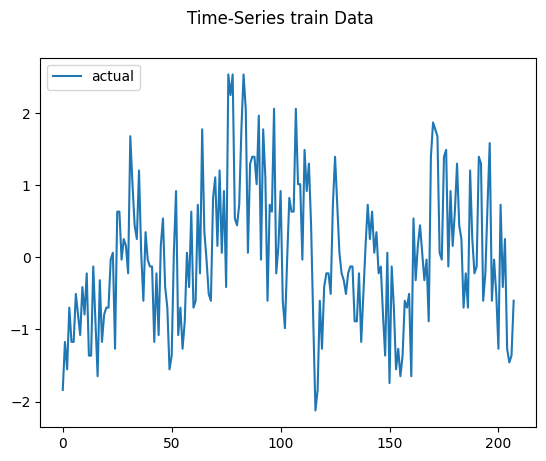

2024-01-16 14:34:40.871204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:41.295117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:41.377220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:42.176296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:42.360246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:43.546071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:43.676131: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 11.
Epoch 19: early stopping


2024-01-16 14:34:52.800864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:52.925085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 91ms/step


2024-01-16 14:34:53.022067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 9.559
Test RMSE: 12.338
Test sMAPE: 26.270
Test R Squared: -0.728
{'mae': 9.55925739512724, 'rmse': 12.338207367844973, 'smape': 26.27047315096313, 'r2': -0.7282256125708453}


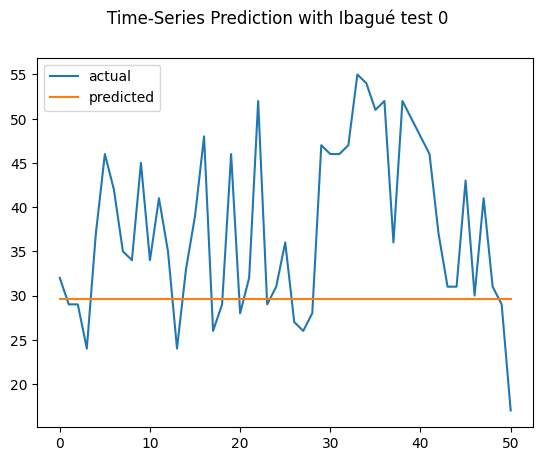

2024-01-16 14:34:55.205148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:55.564889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:55.647831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:56.227213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:56.450683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:59.255428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:34:59.434672: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 11.
Epoch 19: early stopping


2024-01-16 14:35:09.564919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:09.719032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:09.895613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 93ms/step
Test MAE: 9.559
Test RMSE: 12.337
Test sMAPE: 26.269
Test R Squared: -0.728
{'mae': 9.558718849630917, 'rmse': 12.337494238865531, 'smape': 26.268735397673954, 'r2': -0.7280258408999982}


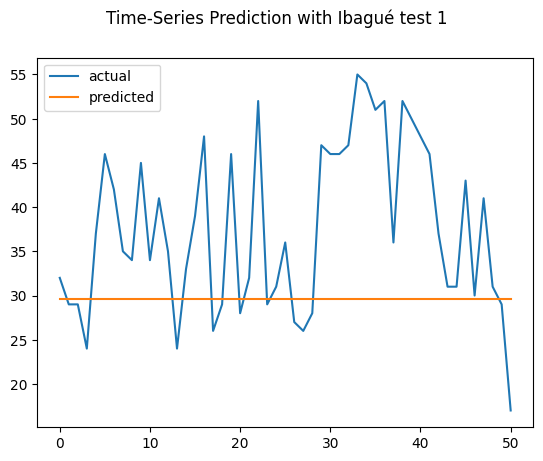

2024-01-16 14:35:12.513739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:12.952301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:13.042300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:13.696975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:13.945413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:15.342461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:15.489240: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 11.
Epoch 19: early stopping


2024-01-16 14:35:25.009440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:25.158590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:35:25.302293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 125ms/step
Test MAE: 9.562
Test RMSE: 12.342
Test sMAPE: 26.279
Test R Squared: -0.729
{'mae': 9.562017440795898, 'rmse': 12.341863042081561, 'smape': 26.279379878523194, 'r2': -0.7292498725155876}


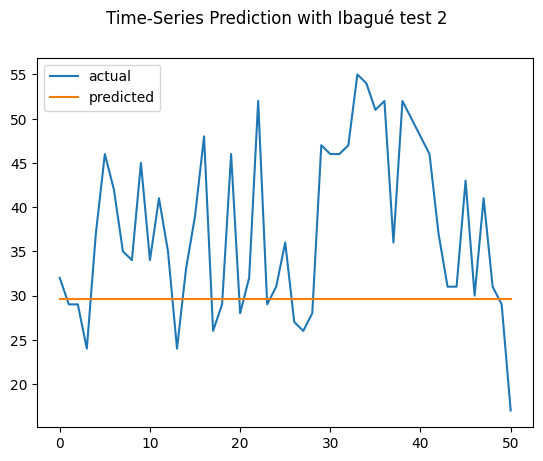

rmse : average=12.339, std=0.002
mae : average=9.560, std=0.001
smape : average=26.273, std=0.005
r2 : average=-0.729, std=0.001


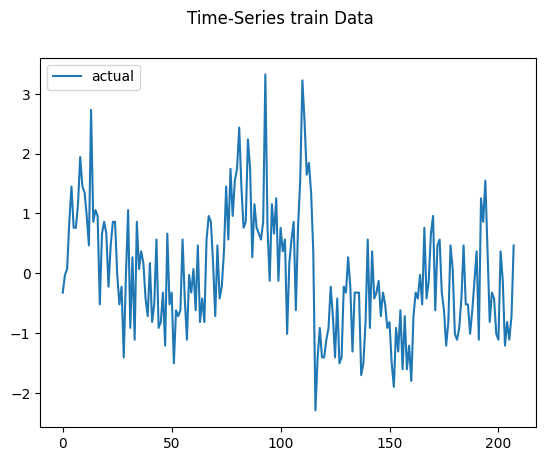

2024-01-16 14:35:27.700392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:28.091209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:28.179493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:28.940088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:29.183341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:30.615217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:30.767342: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:35:36.016363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:36.147716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:35:36.306208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 153ms/step
Test MAE: 6.309
Test RMSE: 8.006
Test sMAPE: 21.715
Test R Squared: -0.000
{'mae': 6.3091821483537265, 'rmse': 8.006406804488979, 'smape': 21.715165273314568, 'r2': -1.6388004619560803e-05}


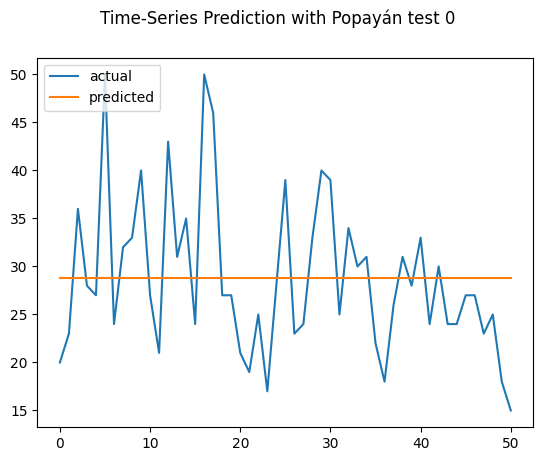

2024-01-16 14:35:40.529493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:40.967295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:41.094097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:41.775225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:42.318121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:44.174195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:44.345210: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:35:49.701344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:49.887984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:35:50.010572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 107ms/step
Test MAE: 6.302
Test RMSE: 8.006
Test sMAPE: 21.690
Test R Squared: -0.000
{'mae': 6.301729426664465, 'rmse': 8.006341487359919, 'smape': 21.68959068472681, 'r2': -7.158837078691249e-08}


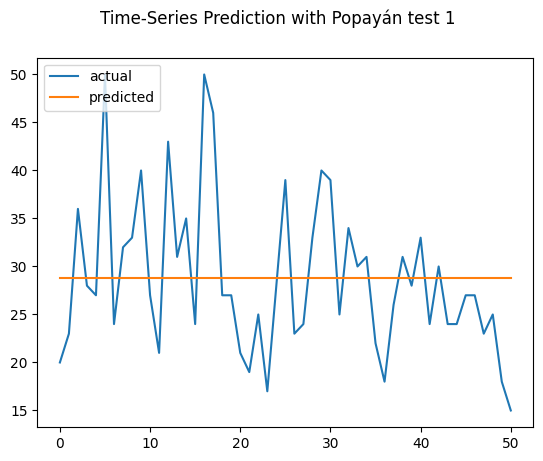

2024-01-16 14:35:52.318291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:52.732062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:52.850502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:53.766635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:54.032293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:55.738634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:35:55.930711: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 1.
Epoch 9: early stopping


2024-01-16 14:36:02.454574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:02.616484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:36:02.723144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 189ms/step
Test MAE: 6.303
Test RMSE: 8.006
Test sMAPE: 21.693
Test R Squared: -0.000
{'mae': 6.302853752585018, 'rmse': 8.006341789601883, 'smape': 21.693451831477276, 'r2': -1.4708902051907558e-07}


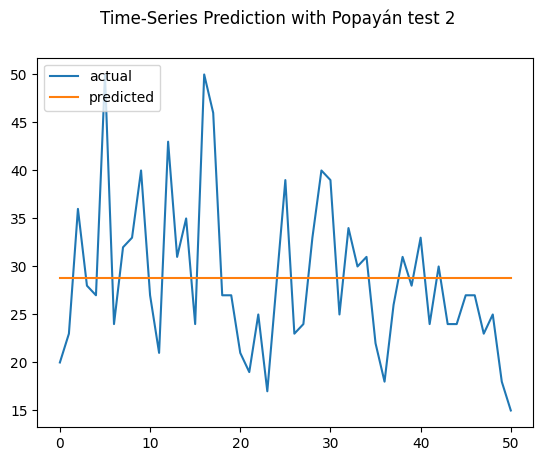

rmse : average=8.006, std=0.000
mae : average=6.305, std=0.003
smape : average=21.699, std=0.011
r2 : average=-0.000, std=0.000


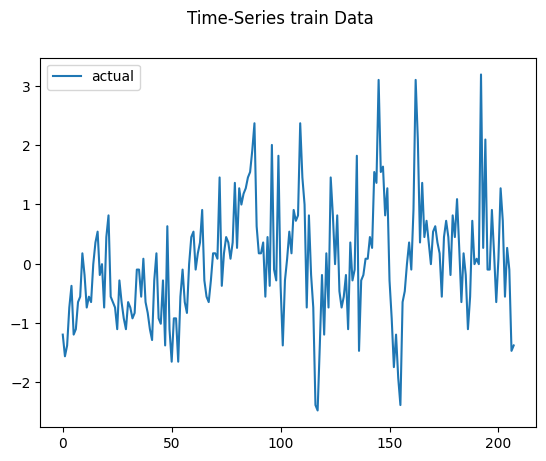

2024-01-16 14:36:06.916880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:07.460135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:07.609273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:08.635857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:09.010985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:10.476180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:10.616135: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 3.
Epoch 11: early stopping


2024-01-16 14:36:18.591921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:18.753344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:36:18.937741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 124ms/step
Test MAE: 8.194
Test RMSE: 10.809
Test sMAPE: 27.126
Test R Squared: -0.001
{'mae': 8.194071414423924, 'rmse': 10.809032694555652, 'smape': 27.125739441037283, 'r2': -0.0007453136939157279}


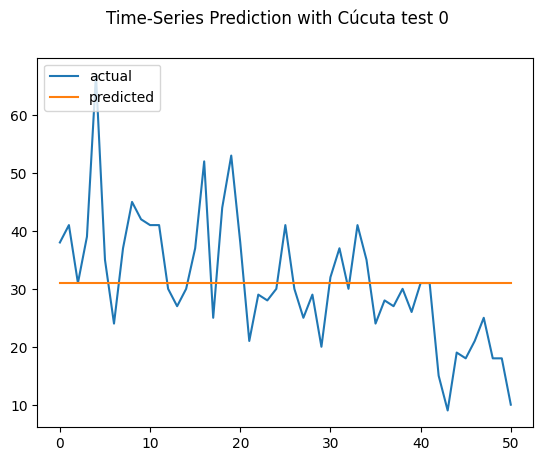

2024-01-16 14:36:21.243248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:21.637482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:21.775611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:22.787892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:23.195653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:25.194227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:25.343207: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 3.
Epoch 11: early stopping


2024-01-16 14:36:32.229231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:32.362241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2024-01-16 14:36:32.551383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 214ms/step
Test MAE: 8.193
Test RMSE: 10.809
Test sMAPE: 27.123
Test R Squared: -0.001
{'mae': 8.193055470784506, 'rmse': 10.809320456847596, 'smape': 27.12288429236868, 'r2': -0.0007985988687457812}


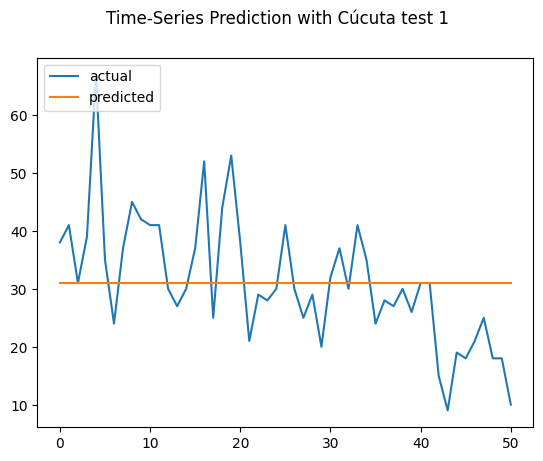

2024-01-16 14:36:34.830375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:35.298766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:35.392728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:36.319931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:36.721089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:38.742154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:38.954383: I tensorflow/core/grappler/optimizers/cust

Restoring model weights from the end of the best epoch: 3.
Epoch 11: early stopping


2024-01-16 14:36:47.103289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:47.333692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-16 14:36:47.492770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 116ms/step
Test MAE: 8.193
Test RMSE: 10.809
Test sMAPE: 27.123
Test R Squared: -0.001
{'mae': 8.19317813948089, 'rmse': 10.809285184456169, 'smape': 27.12322915803378, 'r2': -0.0007920673753987195}


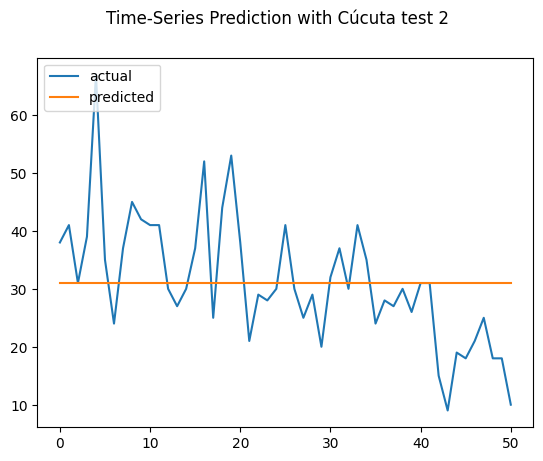

rmse : average=10.809, std=0.000
mae : average=8.193, std=0.000
smape : average=27.124, std=0.001
r2 : average=-0.001, std=0.000


In [21]:
# Use the Function:
if T != 0: 
    sequence=train_X[0].shape[1]
    features=train_X[0].shape[2]
else:
    sequence=T
    features=train_X[0].shape[1]

results_list = []
for i in range(len(train_X)):
    results = calculate_mean_std(lstm_layers, nn_layers, sequence, features, dense_acivation, recurrent_cells, bidirectional, train_X[i], train_y[i], test_X[i], test_y[i], scalers_list[i]['scaler_Labels'], monitor=True, plot=None, epochs=50, batch_size=16, n_tests=n_tests, plot_samples=True, Municipality=Municipalities[i])
    results_list.append(results)

In [25]:
for i in range(len(train_X)):
    print(f'The results for {Municipalities[i]} are:')
    print(f'RMSE: {results_list[i][0]}')
    print(f'MAE: {results_list[i][1]}')
    print(f'sMAPE: {results_list[i][2]}')
    print('R squared: ', results_list[i][3])
    print(results_list[i])
    print('\n')

The results for Medellín are:
RMSE: [34.10125374802859, 0.0004974798134963671]
MAE: [27.28667704264323, 0.003770260397601477]
sMAPE: [16.35210568462225, 0.002221340079476443]
R squared:  [-0.0005515056573244989, 2.919259576055329e-05]
([34.10125374802859, 0.0004974798134963671], [27.28667704264323, 0.003770260397601477], [16.35210568462225, 0.002221340079476443], [-0.0005515056573244989, 2.919259576055329e-05])


The results for Cali are:
RMSE: [24.832147495950295, 0.001556017495026892]
MAE: [20.07339672013825, 0.0007319668449763444]
sMAPE: [18.158507827991514, 0.0006831416612387638]
R squared:  [-0.09307806327040742, 0.00013698625632247303]
([24.832147495950295, 0.001556017495026892], [20.07339672013825, 0.0007319668449763444], [18.158507827991514, 0.0006831416612387638], [-0.09307806327040742, 0.00013698625632247303])


The results for Soacha are:
RMSE: [26.81370396771153, 0.0034210655344036364]
MAE: [20.403951009114582, 0.003271365100122862]
sMAPE: [37.32172486885445, 0.007208680559